## **Laboratorio 9: El Método de Newton**
**Facultad de ingeniería, Departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340: Fundamentos de Machine Learning**

**Nombres de los integrantes**


1.  Laura Julieth Carretero Serrano
2.  Juan David Rios Nisperuza

**Número del grupo**

*3*




# **Método de Newton**

El *Método de Newton*, al igual que el algoritmo de Descenso de Gradiente, es un método de búsqueda de línea utilizado para encontrar el mínimo de una función $f: \mathbb{R^n} \rightarrow \mathbb{R}$. A diferencia del Descenso de Gradiente, que emplea únicamente el gradiente como dirección de búsqueda, el Método de Newton utiliza la dirección dada por el producto de la inversa de la matriz Hessiana con el gradiente de la función. Esto le permite aprovechar información de la curvatura de $f$, logrando, en muchos casos, una convergencia más rápida.

**1. Fundamento teórico**

Tal como los demás métodos de búsqueda de línea, el método de Newton encuentra su fundamento teórico en el Teorema de Taylor:

*Teorema de Taylor:* Suponga que $f: \mathbb{R^n} \rightarrow \mathbb{R}$ es continuamente diferenciable y que $p \in \mathbb{R^n}$. Entonces tenemos que:

$$
f(x + p) = f(x) +  p^{T}  \nabla f(x + tp)
$$

Para algún $t \in (0,1)$. Más aún, si $f$ es dos veces continuamente diferenciable, tenemos que:

$$
f(x + p) = f(x) +  p^{T}  \nabla f(x + tp) + \frac{1}{2}p^{T} \nabla ^{2} f(x + tp)p
$$

Para algún $t \in (0,1)$. Así, *el teorema de Taylor nos permite construir una aproximación a la función alrededor de un punto $x$ en su dominio a partir del valor del gradiente y de la Hessiana de la función en dicho punto*. Dentro del contexto de la optimización numérica, $p$ se conoce como dirección de búsqueda y se elige de modo que:

$$
min_{(\alpha > 0)} f(x_{k} + \alpha p)
$$

Siendo $\alpha$ la longitud de paso o tasa de aprendizaje.

Al tomar como dirección de búsqueda $p$ aquella opuesta al gradiente de la función, recuperamos el algoritmo de Descenso de Gradiente que ya conocemos:

$$
x_{n+1} = x_{n} - \alpha  \nabla f(x) 
$$

Sin embargo, no es la única dirección de búsqueda que podemos definir. En primer lugar, vamos a suponer que podemos aproximar la función $f$ a través de una función modelo $m_{k}$, cuyo comportamiento cerca al punto actual $x_{k}$ es similar al de la función objetivo $f$ en dicho punto, $f_{k}$, y que esa función es cuadrática y de la forma:

$$
m_{k} (x_{k} + p) = f_{k} + p^{T} \nabla f_{k} + \frac{1}{2} p^{T} B_{k} p 
$$

Donde $f_k$, $\nabla f_k$ y $B_k$ es un escalar, un vector y una matriz respectivamente. *Nota que se parece demasiado a la expansión a segundo orden del Teorema de Taylor*, y no es gratuito, porque justamente vamos a asumir que ambas expresiones son iguales:

$$
f(x_{k} + p) \approx f_{k} +  p^{T}  \nabla f_{k} + \frac{1}{2}p^{T} \nabla ^{2} f_{k} p = m_{k}
$$

De esta forma, hallar la dirección de búsqueda que minimiza $f$ se reduce a hallar la dirección de búsqueda que minimiza a $m_{k}$, esto es, por supuesto, calcular el gradiente de $m_{k}$, igualar a cero y despejar $p$:

$$
\nabla m_{k} = \nabla [f_{k} + p^{T} \nabla f_{k} + \frac{1}{2} p^{T} B_{k} p] = 0
$$

$$
\nabla m_{k} = \nabla f_{k} + \nabla ^{2} f_{k} p^{T} = 0
$$

Es decir,

$$
p^{T} = - ( \nabla ^{2} f_{k} )^{-1} \nabla f_{k}
$$

Por lo tanto, al considerar la nueva dirección de búsqueda y asumiendo $\nabla ^{2} f_{k}$ es definida positiva (¿por qué esto es necesario?) tenemos que:

$$
x_{n+1} = x_{n} - ( \nabla ^{2} f_{k} )^{-1} \nabla f_{k}
$$

Esta expresión iterativa es lo que se conoce como *método de Newton*. Bajo esta alternativa, aproximamos a una forma cuadrática una región cercana al mínimo de la función. Conforme mejor se adapte la función objetivo a una forma cuadrática más preciso será el mínimo hallado. Note que en esta expresión no aparece la tasa de aprendizaje $\alpha$, esto se debe a que, por lo general, las implementaciones del método de Newton asumen $\alpha = 1$.


**2. Algoritmo del Método de Newton**

Veamos paso a paso como opera el algoritmo:

0. **Definimos un parámetro de convergencia $ϵ$ y un número máximo de iteraciones $N_{max}$**: El parámetro de convergencia nos ayuda a definir la precisión que se quiere alcanzar durante la búsqueda. El número máximo de iteraciones es un límite que evita que el algoritmo se quede estancado en un ciclo indeterminado y pueda ocasionar daños al procesador. Al cumplirse este límite el algoritmo debe detenerse inmediatamente.

1. **Iniciamos desde un punto de partida ($x_0$)**: Este punto inicial es arbitrario, un punto cualquiera en el dominio de la función. Su elección se hace crítica cuando la función no es convexa o tiene varios mínimos locales.

2. **Calculamos el gradiente y la matriz Hessiana para la función en este punto $\nabla_f(x_{0}), \nabla^{2} f(x_{0})$**: Calculamos el vector gradiente de la función objetivo $\nabla_{f}$ y su matriz Hessiana $\nabla^{2} f$ y los evaluamos en el punto de partida $\nabla_{f}(x_{0})$ y $\nabla^{2} f(x_{0})$.

3. **Calculamos la inversa de la matriz Hessiana $(\nabla^{2} f(x_{0}))^{-1}$**: Para esto debemos asegurarnos que la matriz Hessiana sea invertible lo cual se tiene si es definida positiva. 

4. **Hallamos un nuevo punto inicial ($x_1$)**: Al tomar la diferencia $x_0 - ( \nabla ^{2} f(x_0) )^{-1} \nabla f(x_0)$ damos un paso en dirección al mínimo que nos lleva a un nuevo punto $x_1$ que se encuentra más cerca de éste valor. Verificamos la condición de parada $||x_{1} - x_{0}||_2<ϵ$. Si se cumple, entonces tomamos $x_1$ como mínimo, si no continuamos al punto 5:

\begin{align*}
x_{1} = x_{0} - ( \nabla ^{2} f(x_{0}) )^{-1} \nabla f (x_{0})
\end{align*}


5. **Iteramos**: Tomando $x_{1}$ como nuevo punto inicial repetimos el proceso anterior, que continua siguiendo el algoritmo:

\begin{align*}
x_{n+1} = x_{n} -( \nabla ^{2} f(x_{n}) )^{-1} \nabla f(x_{n})
\end{align*}

Hasta que se cumpla la condición de parada $||x_{n+1} - x_{n}||_2<ϵ$. Cuando se cumple finaliza el método y tomamos el último valor $x_{n+1}$ como el mínimo de la función.

**3. Ventajas del Método de Newton**

- **Convergencia rápida**: Cuando la función objetivo es suave, convexa y dos veces diferenciable, el método de Newton converge mucho más rápido que el Descenso de Gradiente.

- **Tasa de Convergencia cuadrática**: Típicamente la tasa de convergencia del método de Newton es cuadrática, lo cual quiere decir que la precisión de la solución mejora exponencialmente en cada iteración.

- **No depende de un Hiperparámetro**: A diferencia del Descenso de Gradiente, el método de Newton aprovecha la información de curvatura de la función, contenida en la matriz Hessiana, para ajustar la dirección y tamaño del paso de búsqueda, lo cual evita problemas de escalado y elimina la necesidad de elegir una tasa de aprendizaje adecuada.


**3. Desventajas del Método de Newton**

- **Alto Costo Computacional**: Calcular la matriz Hessiana y su inversa en cada iteración tiene un costo computacional de $O(n^3)$, en comparación el método de Descenso de Gradiente tiene un costo computacional de $O(n)$. Por lo tanto, el Descenso de Gradiente es mucho más escalable en problemas con grandes cantidades de datos.

- **Depende de forma crítica de la matriz Hessiana**: Si la matriz Hessiana es singular no puede aplicarse directamente el método. Si tiene valores propios muy pequeños o muy grandes (esta mal condicionada) el método se torna inestable, puesto que en las direcciones en las que el gradiente coincida con los autovectores de la matriz Hessiana inversa los pasos serán muy pequeños o muy grandes haciendo que el algoritmo se estanque, oscile en torno al mínimo o diverja.

- **Funciones Complejas y No Convexas**: Si la función es no convexa, el método de Newton puede converger a un punto de silla en lugar de un mínimo. El método de Newton es ideal para funciones cuadráticas o que localmente sigan un comportamiento cuadrático, en funciones con comportamientos distintos puede requerir de más iteraciones para converger debido a la pérdida de precisión de la aproximación.

**1.1 Ejercicios**

El objetivo de esta práctica es comparar el método de Newton con el algoritmo de Descenso de Gradiente minimizando una función de prueba con una condición de parada previamente definida. Para esto, tome la siguiente expresión como función objetivo:

$$
 f(x) = (1-x_1)^2 + 5(x_2-x_1^2)^2,
$$

donde $x \in \mathbb{R^2}$. 



1. Encuentre  analíticamente el vector gradiente y la matriz Hessiana para la función objetivo y escribalos a continuación:

# **Vector Gradiente**

$$
f(x) = (1 - x_1)^2 + 5(x_2 - x_1^2)^2,
$$

### **Paso 1: Derivada parcial con respecto a \( x_1 \)**


$$
\frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1} \left( (1 - x_1)^2 + 5(x_2 - x_1^2)^2 \right).
$$

Derivamos el primer término:

$$
\frac{\partial}{\partial x_1} (1 - x_1)^2 = 2(1 - x_1)(-1) = -2(1 - x_1).
$$

Derivamos el segundo término usando la regla de la cadena:

$$
\frac{\partial}{\partial x_1} 5(x_2 - x_1^2)^2 = 5 \cdot 2(x_2 - x_1^2) \cdot \frac{\partial}{\partial x_1} (x_2 - x_1^2).
$$

Como  

$$
\frac{\partial}{\partial x_1} (x_2 - x_1^2) = -2x_1,
$$

entonces:

$$
\frac{\partial}{\partial x_1} 5(x_2 - x_1^2)^2 = 10(x_2 - x_1^2)(-2x_1) = -20x_1(x_2 - x_1^2).
$$

Sumando ambas partes:

$$
\frac{\partial f}{\partial x_1} = -2(1 - x_1) - 20x_1(x_2 - x_1^2).
$$

### **Paso 2: Derivada parcial con respecto a \(x_2\)**  

$$
\frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2} \left( (1 - x_1)^2 + 5(x_2 - x_1^2)^2 \right).
$$

El primer término no depende de \(x_2\), así que su derivada es cero. Para el segundo término:

$$
\frac{\partial}{\partial x_2} 5(x_2 - x_1^2)^2 = 5 \cdot 2 (x_2 - x_1^2) \cdot \frac{\partial}{\partial x_2} (x_2 - x_1^2).
$$

Dado que  

$$
\frac{\partial}{\partial x_2} (x_2 - x_1^2) = 1,
$$

entonces:

$$
\frac{\partial f}{\partial x_2} = 10(x_2 - x_1^2).
$$

### **Gradiente final**  

$$
\nabla f(x) =
\begin{bmatrix}
-2(1 - x_1) - 20x_1(x_2 - x_1^2) \\
10(x_2 - x_1^2)
\end{bmatrix}.
$$


# **Matriz Hessiana**

La matriz Hessiana de f(x) se define como:

$$
H_f(x) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}.
$$

Calculamos las segundas derivadas parciales:

1. Segunda derivada con respecto a \(x_1\):

$$
\frac{\partial^2 f}{\partial x_1^2} = 2 - 20(x_2 - 3x_1^2).
$$

2. Segunda derivada mixta:

$$
\frac{\partial^2 f}{\partial x_1 \partial x_2} = -20x_1.
$$

3. Segunda derivada con respecto a \( x_2 \):

$$
\frac{\partial^2 f}{\partial x_2^2} = 10.
$$

Por lo tanto, la matriz Hessiana es:

$$
H_f(x) =
\begin{bmatrix}
2 - 20(x_2 - 3x_1^2) & -20x_1 \\
-20x_1 & 10
\end{bmatrix}.
$$


2. Implemente el método de Newton teniendo en cuenta la condición de parada y haciendo uso de los siguientes parámetros:

 - $\epsilon =0.01$
 - $x[0]=[0,0]^T$
 - $N_{max} = 100$


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym  

def funcion_objetivo(x1, x2):
    """Evalúa la función en un punto (x1, x2)."""
    return (1 - x1)**2 + 5 * (x2 - x1**2)**2

def gradiente(x):
    """Calcula el gradiente de f(x)."""
    x1, x2 = x
    df_dx1 = -2 * (1 - x1) - 20 * x1 * (x2 - x1**2)
    df_dx2 = 10 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def hessiana(x):
    """Calcula la matriz Hessiana de f(x)."""
    x1, x2 = x
    d2f_dx1dx1 = 2 - 20 * (x2 - 3*x1**2)
    d2f_dx1dx2 = -20 * x1
    d2f_dx2dx1 = -20 * x1
    d2f_dx2dx2 = 10
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])

In [96]:


def metodo_newton(x0, epsilon, max_iter):
    """Implementa el Método de Newton para minimizar f(x) y guarda datos para graficar."""
    x = np.array(x0, dtype=float)

    # Inicializamos la trayectoria, los valores de la función y las diferencias
    trayectoria = [x.copy()] 
    valores_funcion = [funcion_objetivo(*x)]
    diferencias = []

    for i in range(max_iter):
        grad = gradiente(x)
        hess = hessiana(x)

        # Verificar si la Hessiana es invertible
        if np.linalg.det(hess) == 0:
            print("La matriz Hessiana no es invertible.")
            break

        # Calcular el siguiente punto
        x_next = x - np.linalg.inv(hess) @ grad

        # Guardar datos para graficar
        trayectoria.append(x_next.copy())
        valores_funcion.append(funcion_objetivo(*x_next))
        diferencias.append(np.linalg.norm(x_next - x, 2))

        # Condición de parada
        if np.linalg.norm(x_next - x, 2) < epsilon:
            print(f"Convergencia alcanzada en {i+1} iteraciones.")
            break

        x = x_next

    return np.array(trayectoria), valores_funcion, diferencias

# Ejecutamos el método de Newton
x_inicial = [0, 0]
trayectoria, valores_funcion, diferencias = metodo_newton(x_inicial, 0.01, 100)

Convergencia alcanzada en 3 iteraciones.


3. En tres subplots diferentes de una misma figura grafique:

*  La trayectoria de búsqueda del mínimo sobre las curvas de nivel de la función objetivo.
*  El valor la función objetivo en cada iteración vs el número de iteración $k$.
*  El valor de $||x[k+1]-x[k]||_2$ vs el número de iteración $k$.



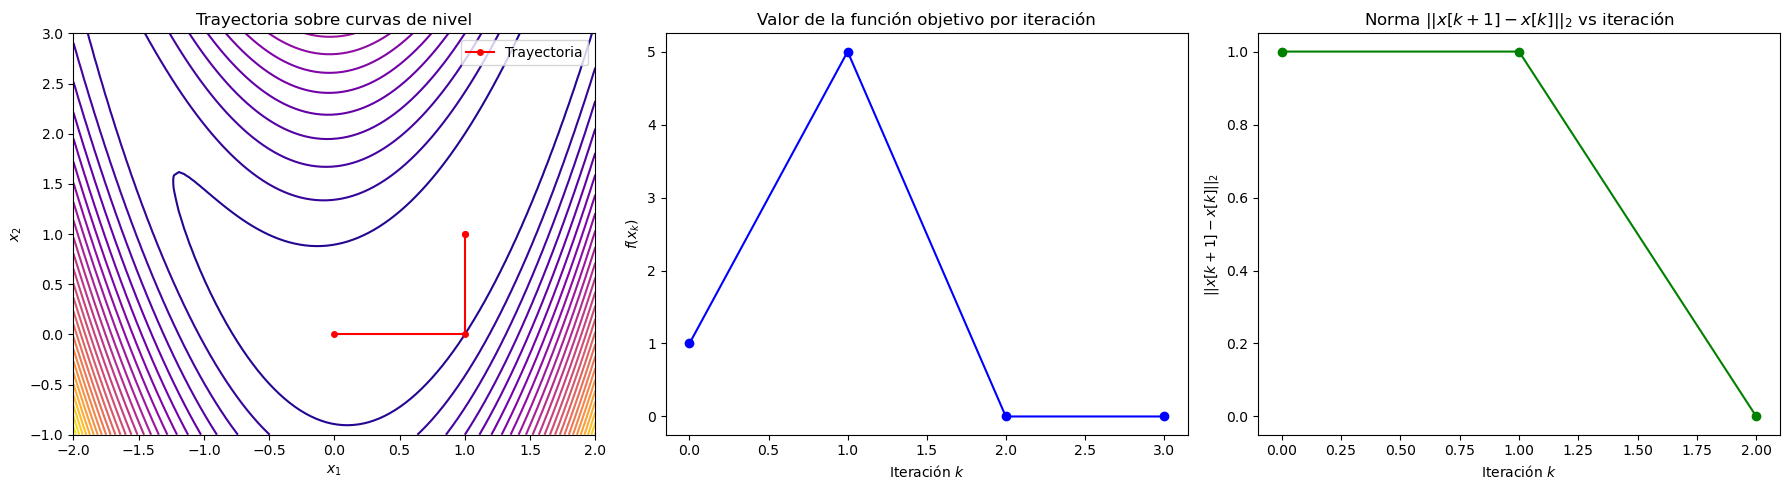

In [97]:
# Celda para agregar el código de las gráficas1
# Extraer coordenadas de la trayectoria
x1_vals, x2_vals = trayectoria[:, 0], trayectoria[:, 1]

# Crear la figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Trayectoria sobre curvas de nivel ---
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = funcion_objetivo(X1, X2)

axes[0].contour(X1, X2, Z, levels=30, cmap="plasma")
axes[0].plot(x1_vals, x2_vals, marker="o", color="red", linestyle="-", markersize=4, label="Trayectoria")
axes[0].set_title("Trayectoria sobre curvas de nivel")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].legend()

# --- 2. Valor de la función objetivo vs iteraciones ---
axes[1].plot(range(len(valores_funcion)), valores_funcion, marker="o", linestyle="-", color="blue")
axes[1].set_title("Valor de la función objetivo por iteración")
axes[1].set_xlabel("Iteración $k$")
axes[1].set_ylabel("$f(x_k)$")

# --- 3. Distancia entre iteraciones ---
axes[2].plot(range(len(diferencias)), diferencias, marker="o", linestyle="-", color="green")
axes[2].set_title("Norma $||x[k+1] - x[k]||_2$ vs iteración")
axes[2].set_xlabel("Iteración $k$")
axes[2].set_ylabel("$||x[k+1] - x[k]||_2$")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

4. Use el algoritmo de Descenso de Gradiente implementado en el laboratorio anterior para encontrar el mínimo de la función objetivo, tome $\alpha =0.05$ y los valores anteriores de $\epsilon$, $N_{max}$ y $x[0]$.

In [ ]:
def descenso_gradiente(x0, alpha, N, epsilon):
    """
    Implementa el algoritmo de Descenso de Gradiente.

    Parámetros:
    - x0: Punto inicial [x1, x2].
    - alpha: Tasa de aprendizaje.
    - N: Número máximo de iteraciones.
    - epsilon: Tolerancia para la convergencia.

    Retorna:
    - history_x: Historial de puntos visitados.
    - history_f: Valores de la función en cada iteración.
    - x_min: Punto donde se alcanzó el mínimo estimado.
    - stop: Indica si se llegó al número máximo de iteraciones (True) o no (False).
    """
    history_x = []
    history_f = []
    norm_diffs = []

    stop = True  # Indica si se alcanzó el máximo de iteraciones

    for i in range(N):
        x_old = x0.copy()
        x0 = x_old - alpha * gradiente(x_old)  # Paso en la dirección del gradiente
        
        history_x.append(list(x0))
        history_f.append(funcion_objetivo(*x0))
        norm_diffs.append(np.linalg.norm(x0 - x_old))
        
        # Condición de parada: norma de la diferencia entre iteraciones
        if np.linalg.norm(x0 - x_old) <= epsilon:
            stop = False
            break

    x_min = x0
    return np.array(history_x), np.array(history_f), x_min, stop, norm_diffs

In [99]:
# --- Parámetros de ejecución ---
x_inicial = np.array([0.0, 0.0])  
alpha = 0.05  
N_max = 100
epsilon = 0.01

history_x, history_f, minimo, stop_flag, norm_diffs  = descenso_gradiente(x_inicial, alpha, N_max, epsilon)

print(f"Se alcanzó el mínimo en: {minimo}")
print(f"¿Se alcanzó el máximo de iteraciones? {'Sí' if stop_flag else 'No'}")

ValueError: not enough values to unpack (expected 5, got 4)

5. De acuerdo a los resultados obtenidos con el algoritmo de Descenso de Gradiente del punto anterior, en tres subplots diferentes de una misma figura grafique:

*  La trayectoria de búsqueda del mínimo sobre las curvas de nivel de la función objetivo.
*  El valor la función objetivo en cada iteración vs el número de iteración $k$.
*  El valor de $||x[k+1]-x[k]||_2$ vs el número de iteración $k$.

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Trayectoria sobre curvas de nivel
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_objetivo(X, Y)

axes[0].contour(X, Y, Z, levels=20, cmap='viridis')
history_x = np.array(history_x)
axes[0].plot(history_x[:, 0], history_x[:, 1], 'ro-', markersize=4, label='Trayectoria')
axes[0].set_title("Trayectoria sobre curvas de nivel")
axes[0].legend()

# Función objetivo vs iteraciones
axes[1].plot(range(len(history_f)), history_f, 'bo-', markersize=4)
axes[1].set_xlabel("Iteración k")
axes[1].set_ylabel("f(x)")
axes[1].set_title("Valor de la función objetivo")

# Norma de diferencia vs iteraciones
axes[2].plot(range(len(norm_diffs)), norm_diffs, 'go-', markersize=4)
axes[2].set_xlabel("Iteración k")
axes[2].set_ylabel("||x[k+1] - x[k]||_2")
axes[2].set_title("Cambio en la posición")

plt.tight_layout()
plt.show()

6. Responda las siguientes preguntas:

- ¿Por qué cree que al algoritmo de Descenso de Gradiente le cuesta más converger que al método de Newton?

- Note el grado del polinómio de la función, ¿para qué grado polinómico el método de Newton converge en una sola iteración?

- ¿Cree que el punto inicial influye en la convergencia de ambos algoritmos?

- ¿Cómo podría mejorar la eficiencia del algoritmo de Descenso de Gradiente?